Source

https://keras.io/examples/keras_recipes/quasi_svm/

In [162]:
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from keras.models import Sequential # try tensorflow.keras.models in case of import error
from keras.layers import Dense # try tensorflow.keras.layers in case of import error
from sklearn.metrics import classification_report
# import training/testing dataset

training_df = pd.read_csv(Path("../Resources/training_dataset_original.csv"))
testing_df = pd.read_csv(Path("../Resources/testing_dataset.csv"))
# split training dataset to X and y

X_train = training_df.drop(columns="status")
y_train = training_df["status"]
# split testing dataset to X and y

X_test = testing_df.drop(columns="status")
y_test = testing_df["status"]

from sklearn.decomposition import PCA

components = 5

pca = PCA(n_components=components)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [163]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures

In [164]:
model = keras.Sequential(
    [
        keras.Input(shape=(components,)),
        RandomFourierFeatures(
            output_dim=4096, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(units=1),
    ]
)
model.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=1e-3),
    loss=keras.losses.hinge,
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")],
)

In [165]:
model.fit(X_train_pca, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
369/369 [==============================] - 3s 8ms/step - loss: 0.3219 - acc: 1.0000 - val_loss: 0.2231 - val_acc: 1.0000
Epoch 2/20
369/369 [==============================] - 2s 5ms/step - loss: 0.3108 - acc: 1.0000 - val_loss: 0.2229 - val_acc: 1.0000
Epoch 3/20
369/369 [==============================] - 2s 7ms/step - loss: 0.2986 - acc: 1.0000 - val_loss: 0.4161 - val_acc: 1.0000
Epoch 4/20
369/369 [==============================] - 2s 7ms/step - loss: 0.2924 - acc: 1.0000 - val_loss: 0.3784 - val_acc: 1.0000
Epoch 5/20
369/369 [==============================] - 2s 7ms/step - loss: 0.2932 - acc: 1.0000 - val_loss: 0.3133 - val_acc: 1.0000
Epoch 6/20
369/369 [==============================] - 2s 5ms/step - loss: 0.2860 - acc: 1.0000 - val_loss: 0.2849 - val_acc: 1.0000
Epoch 7/20
369/369 [==============================] - 2s 7ms/step - loss: 0.2880 - acc: 1.0000 - val_loss: 0.3253 - val_acc: 1.0000
Epoch 8/20
369/369 [==============================] - 2s 6ms/step - loss: 0.

In [166]:
# make prediction and print classification report
y_pred = model.predict(X_test_pca)

y_pred.shape

615/615 [==============================] - 1s 1ms/step


(19671, 1)

In [167]:
y_pred = y_pred[:,0]
pd.Series(y_pred).describe()

count    19671.000000
mean        -3.458025
std          0.319119
min         -7.284185
25%         -3.496885
50%         -3.476592
75%         -3.462681
max          1.121636
dtype: float64

In [176]:
threshold = 0.31

In [177]:
pred = np.where(y_pred < threshold, 0, 1)

In [178]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.00      0.00      0.00      1254

    accuracy                           0.94     19671
   macro avg       0.47      0.50      0.48     19671
weighted avg       0.88      0.94      0.91     19671



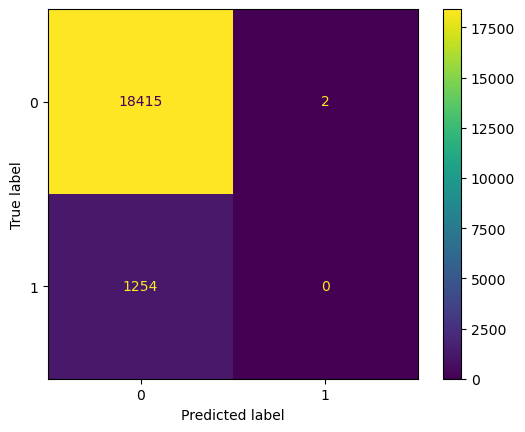

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, pred))
matrix.plot()
plt.show()